# LINE SEARCH ALGORITHM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Function definition and it's gradient

In [2]:
# Function  
def f(x):
    x1, x2 = x[0], x[1]
    return 10*x1**2 + 5*x1*x2 + 10*(x2 - 3)**2

# Gradient 
def grad_f(x):
    x1, x2 = x[0], x[1]
    df_dx1 = 20*x1 + 5*x2
    df_dx2 = 5*x1 + 20*(x2 - 3)
    return np.array([df_dx1, df_dx2])

# Analytical closed-form solution: solve grad f = 0
H = np.array([[20., 5.],
              [ 5., 20.]]) # Hessian matrix

b = np.array([0., 60.]) # from gradient calculation

x_closed = np.linalg.solve(H, b)
f_closed = f(x_closed)


## Line Search Algorithm Implementation

In [3]:
# Wolfe condition check

def wolfe(x,p,alpha,c1=1e-4,c2=0.1):
    return f(x+alpha*p)<=f(x)+c1*alpha*grad_f(x)@p and abs(grad_f(x+alpha*p)@p)<=c2*abs(grad_f(x)@p)

In [4]:
# Line search minimization

def minimize_linesearch(x0, tol=1e-3):
    x = x0.copy()
    traj = [x.copy()]
    rng = np.random.default_rng(1)
    for k in range(10000):
        d = -grad_f(x)
        if np.linalg.norm(d) < tol: break
        alpha = None
        for _ in range(500):
            a_try = rng.random()
            if wolfe(x,d,a_try): alpha = a_try; break
        if alpha is None: alpha = 1e-3
        x = x + alpha*d
        traj.append(x.copy())
        print(f"Iter {k+1}: alpha={alpha:.4f}, x={x}, f={f(x):.6f}, ||grad||={np.linalg.norm(grad_f(x)):.4e}")
    return x, f(x), k+1, np.array(traj)




## Run optimization

In [5]:
x0 = np.array([10., 15.])
xmin, fmin, iters, traj = minimize_linesearch(x0)
print("\nFound minimizer:", xmin, "f(x) =", fmin, "iterations:", iters)

Iter 1: alpha=0.0396, x=[-0.88804108  3.51806577], f=-5.050844, ||grad||=5.9236e+00
Iter 2: alpha=0.0460, x=[-0.8802006   3.24577062], f=-5.933083, ||grad||=1.4682e+00
Iter 3: alpha=0.0618, x=[-0.79515124  3.21395598], f=-5.997479, ||grad||=3.4617e-01
Iter 4: alpha=0.0385, x=[-0.80157821  3.20226393], f=-5.999942, ||grad||=4.2517e-02
Iter 5: alpha=0.0691, x=[-0.80017951  3.19968082], f=-5.999998, ||grad||=8.9393e-03
Iter 6: alpha=0.0376, x=[-0.79998443  3.1999547 ], f=-6.000000, ||grad||=8.3249e-04

Found minimizer: [-0.79998443  3.1999547 ] f(x) = -5.999999980582297 iterations: 7


## Plotting

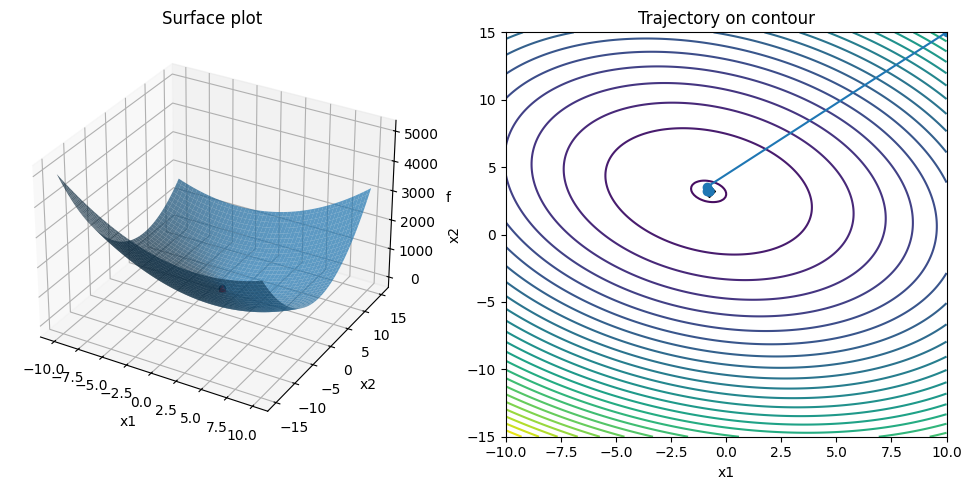

In [6]:
x1 = np.linspace(-10,10,200)
x2 = np.linspace(-15,15,200)
X1,X2 = np.meshgrid(x1,x2)
Z = f([X1,X2])

fig=plt.figure(figsize=(10,5))

# Surface
ax1=fig.add_subplot(121,projection='3d')
ax1.plot_surface(X1,X2,Z,alpha=.7)
ax1.scatter(*x_closed,f_closed,c='k',marker='o')
ax1.scatter(*xmin,fmin,c='r',marker='^')
ax1.set_title("Surface plot"); ax1.set_xlabel("x1"); ax1.set_ylabel("x2"); ax1.set_zlabel("f")

# Contour + Trajectory
ax2=fig.add_subplot(122)
ax2.contour(X1,X2,Z,30)
ax2.plot(traj[:,0],traj[:,1],'-o')
ax2.scatter(*x_closed,c='k',marker='D')
ax2.set_title("Trajectory on contour"); ax2.set_xlabel("x1"); ax2.set_ylabel("x2")

plt.tight_layout()
plt.show()
